Python code example using Euler’s Method to solve a simple first-order ODE:

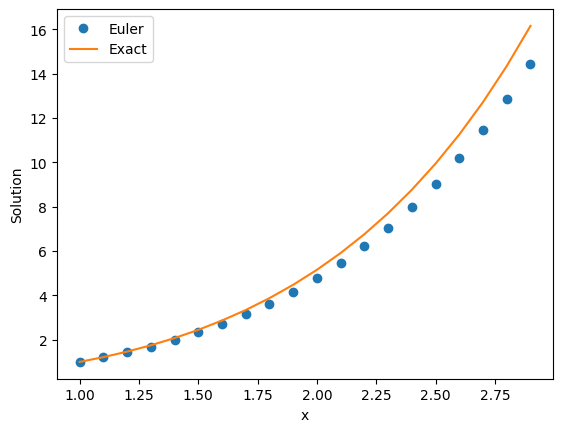

In [ ]:
import numpy as np

def f(x, y):  # define the ODE function
    return x + y
def euler_method(x0, y0, xN, h):
    x = np.arange(x0, xN, h)  # time points
    y = np.zeros((len(x),))  # initialize solution array
    y[0] = 1  # set initial condition

    for i in range(1, len(x)):
        y[i] = y[i-1] + h * f(x[i-1], y[i-1])

    return x, y
x0 = 1
y0=1
xN = 3
h=0.1
x, y = euler_method(x0, y0, xN, h)
yExact = -x-1+3*np.exp(x-1)
import matplotlib.pyplot as plt
plt.plot(x, y,'o',x,yExact,'-')
plt.legend(['Euler', 'Exact'])
plt.xlabel('x')
plt.ylabel('Solution')
plt.show()

Solving 2nd Order ODE with Euler's method

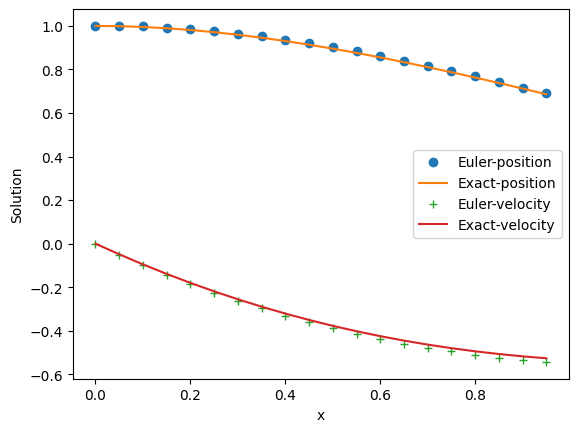

In [ ]:
import numpy as np
def y0p(x,y0,y1):  # define the ODE function
    return y1
def y1p(x,y0,y1):
    return -y1-y0

def euler_method(x0, y0, y1, xN, h):
    x = np.arange(x0, xN, h)  # time points
    y0 = np.zeros((len(x),))  # initialize solution array
    y1 = np.zeros((len(x),))  # initialize solution array
    y0[0] = 1  # set initial condition
    y1[0] = 0  # set initial condition

    for i in range(1, len(x)):
        y0[i] = y0[i-1] + h * y0p(x[i-1],y0[i-1],y1[i-1])
        y1[i] = y1[i-1] + h * y1p(x[i-1],y0[i-1],y1[i-1])
    return x, y0,y1
x0 = 0
y0 = 1  # initial condition
y1 = 0  # initial condition
xN = 1
h = 0.05  # step size

x, y0,y1 = euler_method(x0, y0, y1,xN, h)
y0Exact = np.exp(-x/2)*(np.cos(np.sqrt(3)*x/2)+(1/np.sqrt(3))*np.sin(np.sqrt(3)*x/2))
y1Exact = -2*np.exp(-x/2)*(np.sin(np.sqrt(3)*x/2))/(np.sqrt(3))
import matplotlib.pyplot as plt
plt.plot(x, y0,'o',x,y0Exact,'-',x,y1,'+',x,y1Exact,'-')
plt.legend(['Euler-position', 'Exact-position','Euler-velocity','Exact-velocity'])
plt.xlabel('x')
plt.ylabel('Solution')

plt.show()

RK 2

Eulers modified method

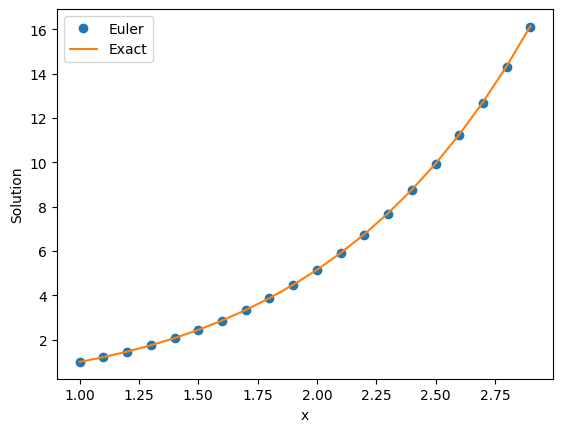

In [ ]:
import numpy as np
def f(x, y):  # define the ODE function
    return x + y
def euler_mod(x0, y0, xN, h):
    x = np.arange(x0, xN, h)  # time points
    y = np.zeros((len(x),))  # initialize solution array
    K=np.zeros((len(x),))
    y[0] = 1  # set initial condition
    for i in range(1, len(x)):
        K[i] = y[i-1] + h*f(x[i-1], y[i-1])
        y[i] = y[i-1] + (h/2) * (f(x[i-1], y[i-1])+f(x[i], K[i]))

    return x, y
x0 = 1
y0 = 1
xN = 3
h = 0.1

x, y = euler_mod(x0, y0, xN, h)
yExact = -x-1+3*np.exp(x-1)
import matplotlib.pyplot as plt
plt.plot(x, y,'o',x,yExact,'-')
plt.legend(['Euler', 'Exact'])
plt.xlabel('x')
plt.ylabel('Solution')
plt.show()

Solving 2nd order ODE using RK2(Modified Euler)

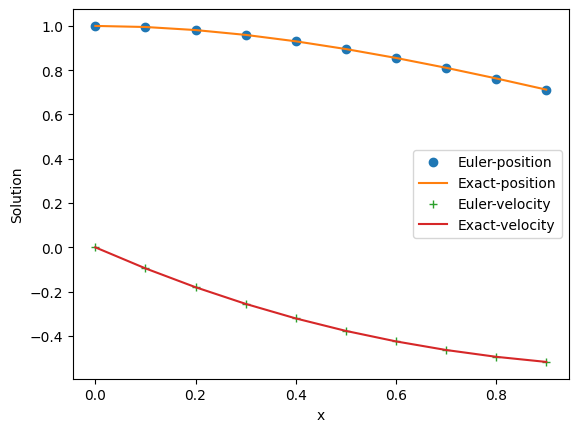

In [ ]:
import numpy as np
def y0p(x,y0,y1):  # define the ODE function
    return y1
def y1p(x,y0,y1):
    return -y1-y0
def euler_mod(x0, y0, y1, xN, h):
    x = np.arange(x0, xN, h)  # time points
    y0 = np.zeros((len(x),))  # initialize solution array
    y1 = np.zeros((len(x),))
    K0  = np.zeros((len(x),)) # initialize solution array
    K1  = np.zeros((len(x),))
    y0[0] = 1  # set initial condition
    y1[0] = 0  # set initial condition

    for i in range(1, len(x)):
        K0[i] = y0[i-1] + h*y0p(x[i-1], y0[i-1],y1[i-1])
        K1[i] = y1[i-1] + h*y1p(x[i-1], y0[i-1],y1[i-1])
        y0[i] = y0[i-1] + (h/2) * (y0p(x[i-1], y0[i-1],y1[i-1])+y0p(x[i],K0[i],K1[i]))
        y1[i] = y1[i-1] + (h/2) * (y1p(x[i-1], y0[i-1],y1[i-1])+y1p(x[i],K0[i],K1[i]))
    return x, y0,y1
x0 = 0
y0 = 1
y1 = 0
xN = 1
h = 0.1
x, y0,y1 = euler_mod(x0, y0, y1,xN, h)
y0Exact = np.exp(-x/2)*(np.cos(np.sqrt(3)*x/2)+(1/np.sqrt(3))*np.sin(np.sqrt(3)*x/2))
y1Exact = -2*np.exp(-x/2)*(np.sin(np.sqrt(3)*x/2))/(np.sqrt(3))

import matplotlib.pyplot as plt
plt.plot(x, y0,'o',x,y0Exact,'-',x,y1,'+',x,y1Exact,'-')
plt.legend(['Euler-position', 'Exact-position','Euler-velocity','Exact-velocity'])
plt.xlabel('x')
plt.ylabel('Solution')

plt.show()


Solving system of 1st Order ODE using RK2(Modified Euler)

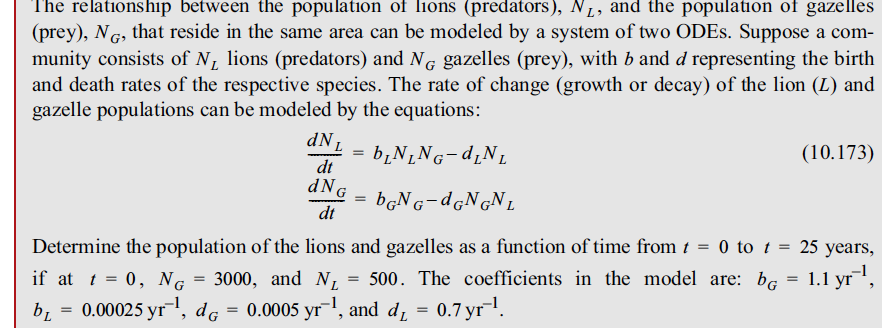

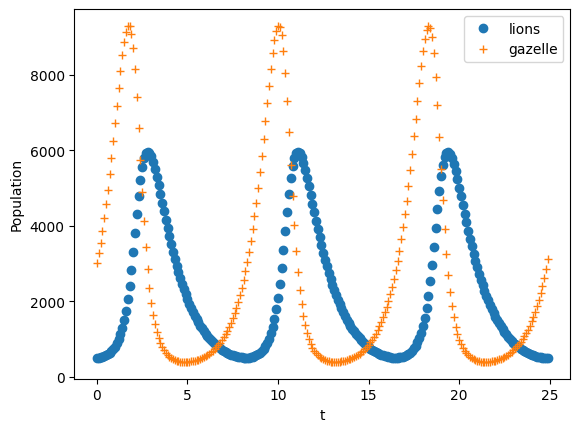

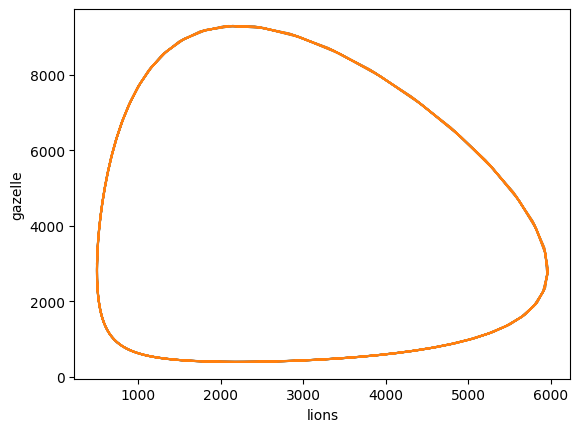

In [ ]:
import numpy as np
def lion(t,nl,ng,bl,dl):  # define the ODE function
    return bl*nl*ng-dl*nl
def gaz(t,nl,ng,bg,dg):  # define the ODE function
    return bg*ng-dg*ng*nl


def euler_method(t0, nl0, ng0, tN,bl,dl,bg,dg, h):
    t = np.arange(t0, tN, h)  # time points
    nl = np.zeros((len(t),))  # initialize solution array
    ng = np.zeros((len(t),))
    Kl1  = np.zeros((len(t),)) # initialize solution array
    Kg1  = np.zeros((len(t),))
    Kl2  = np.zeros((len(t),)) # initialize solution array
    Kg2  = np.zeros((len(t),))
    nl[0] = 500  # set initial condition
    ng[0] = 3000  # set initial condition

    for i in range(1, len(t)):
        Kl1[i-1] = lion(t[i-1],nl[i-1],ng[i-1],bl,dl)
        Kg1[i-1] = gaz(t[i-1],nl[i-1],ng[i-1],bg,dg)
        Kl2[i] = lion(t[i], nl[i-1]+Kl1[i-1]*h,ng[i-1]+Kg1[i-1]*h,bl,dl)
        Kg2[i] = gaz(t[i], nl[i-1]+Kl1[i-1]*h,ng[i-1]+Kg1[i-1]*h,bg,dg)

        nl[i] = nl[i-1] + (h/2) * (Kl1[i-1]+Kl2[i])
        ng[i] = ng[i-1] + (h/2) * (Kg1[i-1]+Kg2[i])

    return t, nl,ng

# Example usage:
t0 = 0  # initial time
nl0 = 500  # initial condition
ng0 = 3000  # initial condition
tN = 25  # final time
h = 0.1  # step size
bg=1.1
bl=0.00025
dg=0.0005
dl=0.7


t, nl, ng = euler_method(t0, nl0, ng0,tN,bl,dl,bg,dg, h)


import matplotlib.pyplot as plt
plt.plot(t, nl,'o',t,ng,'+')
plt.legend(['lions', 'gazelle'])
plt.xlabel('t')
plt.ylabel('Population')

plt.show()
plt.plot( nl,ng)

plt.xlabel('lions')
plt.ylabel('gazelle')
plt.plot(nl,ng)